# Melon Graph

## 필요 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

## 파일 불러오기

In [5]:
site_name = 'melon'

In [6]:
# 기간 설정
start_date = '2022-05-02'
end_date = '2022-05-08'

In [7]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [8]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/mod_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [9]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_melon_20220405.xlsx
1 live_melon_20220406.xlsx
2 live_melon_20220407.xlsx
3 live_melon_20220412.xlsx
4 live_melon_20220413.xlsx
5 live_melon_20220413_153438.xlsx
6 live_melon_20220414_134807.xlsx
7 live_melon_20220415_180604.xlsx
8 live_melon_20220418_110427.xlsx
9 live_melon_20220419_110436.xlsx
10 live_melon_20220420_110419.xlsx
11 live_melon_20220421_110456.xlsx
12 live_melon_20220422_110438.xlsx
13 live_melon_20220425_110456.xlsx
14 live_melon_20220426_110432.xlsx
15 live_melon_20220427_110430.xlsx
16 live_melon_20220428_110400.xlsx
17 live_melon_20220429_110400.xlsx
18 live_melon_20220430_110400.xlsx
19 live_melon_20220501_110400.xlsx
20 live_melon_20220502_110400.xlsx
21 live_melon_20220503_110400.xlsx
22 live_melon_20220504_110400.xlsx
23 live_melon_20220505_110400.xlsx
24 live_melon_20220506_110400.xlsx
25 live_melon_20220507_110400.xlsx
26 live_melon_20220508_110400.xlsx
27 live_melon_20220509_110400.xlsx


## 수집한 파일 모두 합치기

In [10]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

사이트                   날짜  순위                     곡                 가수  \
0  melon  2022-04-05 00:00:00   1  봄여름가을겨울 (Still Life)       BIGBANG (빅뱅)   
1  melon  2022-04-05 00:00:00   2                TOMBOY            (여자)아이들   
2  melon  2022-04-05 00:00:00   3        Feel My Rhythm  Red Velvet (레드벨벳)   
3  melon  2022-04-05 00:00:00   4  GANADARA (Feat. 아이유)                박재범   
4  melon  2022-04-05 00:00:00   5                사랑인가 봐               멜로망스   

                                          앨범          소속사 소속사_분류  
0                       봄여름가을겨울 (Still Life)           YG     YG  
1                                I NEVER DIE         CUBE     기타  
2  ‘The ReVe Festival 2022 - Feel My Rhythm’           SM     SM  
3                                   GANADARA  MORE VISION     기타  
4                   사랑인가 봐 (사내맞선 OST 스페셜 트랙)        ABYSS     기타

In [11]:
df['날짜'] = df['날짜'].astype(str)

In [12]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

사이트          날짜  순위                     곡            가수  \
0  melon  2022-05-02   1  봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)   
1  melon  2022-05-02   2             LOVE DIVE     IVE (아이브)   
2  melon  2022-05-02   3                TOMBOY       (여자)아이들   
3  melon  2022-05-02   4                사랑인가 봐          멜로망스   
4  melon  2022-05-02   5             사랑은 늘 도망가           임영웅   

                         앨범    소속사 소속사_분류  
0      봄여름가을겨울 (Still Life)     YG     YG  
1                 LOVE DIVE    스타쉽    스타쉽  
2               I NEVER DIE   CUBE     기타  
3  사랑인가 봐 (사내맞선 OST 스페셜 트랙)  ABYSS     기타  
4        신사와 아가씨 OST Part.2  물고기뮤직     기타

In [13]:
sliced_df.tail()

사이트          날짜   순위          곡          가수                    앨범  \
695  melon  2022-05-08   96         초대        멜로망스                    초대   
696  melon  2022-05-08   97  Starlight  태일 (TAEIL)  스물다섯 스물하나 OST Part 1   
697  melon  2022-05-08   98   Darl+ing         세븐틴              Darl+ing   
698  melon  2022-05-08   99         서랍        10CM    그 해 우리는 OST Part.1   
699  melon  2022-05-08  100  내 생에 아름다운         이예준             내 생에 아름다운   

             소속사 소속사_분류  
695        ABYSS     기타  
696           SM     SM  
697         플레디스   플레디스  
698  매직스트로베리 사운드     기타  
699    iMe KOREA     기타

In [14]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이트     700 non-null    object
 1   날짜      700 non-null    object
 2   순위      700 non-null    int64 
 3   곡       700 non-null    object
 4   가수      700 non-null    object
 5   앨범      700 non-null    object
 6   소속사     700 non-null    object
 7   소속사_분류  700 non-null    object
dtypes: int64(1), object(7)
memory usage: 43.9+ KB


### 수집한 곡의 유니크

In [15]:
len(sliced_df['곡'].unique())

114

In [16]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

날짜
0  2022-05-02
1  2022-05-03
2  2022-05-04
3  2022-05-05
4  2022-05-06
5  2022-05-07
6  2022-05-08

### 제목과 가수 매칭 값 추출

In [17]:
sort_df = sliced_df[['곡', '가수']]
sort_df

곡            가수
0    봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)
1               LOVE DIVE     IVE (아이브)
2                  TOMBOY       (여자)아이들
3                  사랑인가 봐          멜로망스
4               사랑은 늘 도망가           임영웅
..                    ...           ...
695                    초대          멜로망스
696             Starlight    태일 (TAEIL)
697              Darl+ing           세븐틴
698                    서랍          10CM
699             내 생에 아름다운           이예준

[700 rows x 2 columns]

In [18]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

곡                  가수
0    봄여름가을겨울 (Still Life)        BIGBANG (빅뱅)
1               LOVE DIVE           IVE (아이브)
2                  TOMBOY             (여자)아이들
3                  사랑인가 봐                멜로망스
4               사랑은 늘 도망가                 임영웅
..                    ...                 ...
109              사랑해요 그대를                 임영웅
110                  인생찬가                 임영웅
111                    초대                멜로망스
112           눈 떠보니 이별이더라                 빅마마
113              FEARLESS  LE SSERAFIM (르세라핌)

[114 rows x 2 columns]

### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [19]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    song_df_list.append(merged_df)

### 노래 개수

In [20]:
len(song_df_list)

114

## 그래프 테스트

### 노래 선택

In [21]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      7 non-null      object 
 1   사이트     2 non-null      object 
 2   순위      2 non-null      float64
 3   곡       7 non-null      object 
 4   가수      7 non-null      object 
 5   앨범      7 non-null      object 
 6   소속사     2 non-null      object 
 7   소속사_분류  2 non-null      object 
 8   순위변동    2 non-null      float64
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


In [22]:
tmp = song_df_list[100]
tmp

날짜    사이트    순위            곡   가수       앨범    소속사 소속사_분류  순위변동
0  2022-05-02    NaN   NaN  다시 만날 수 있을까  임영웅  IM HERO    NaN    NaN   NaN
1  2022-05-03  melon   9.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
2  2022-05-04  melon  10.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타  -1.0
3  2022-05-05  melon  10.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
4  2022-05-06  melon  10.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
5  2022-05-07  melon  11.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타  -1.0
6  2022-05-08  melon   9.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   2.0

In [23]:
tmp['곡'].value_counts().index.values[0]

'다시 만날 수 있을까'

In [24]:
tmp['가수'].value_counts().index.values[0]

'임영웅'

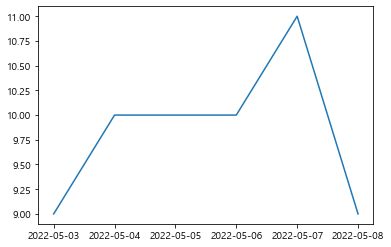

In [25]:
plt.plot(tmp['날짜'], tmp['순위'])

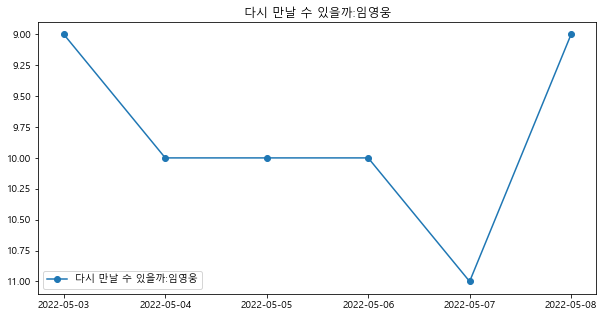

In [26]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [27]:
temp_df = song_df_list[70:91]

### 그래프

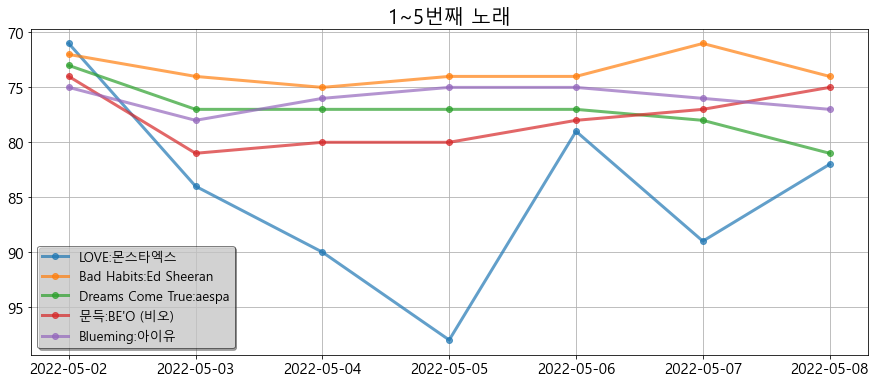

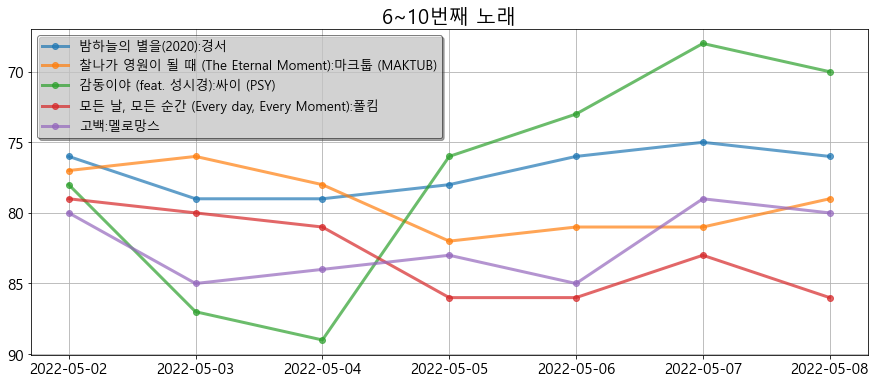

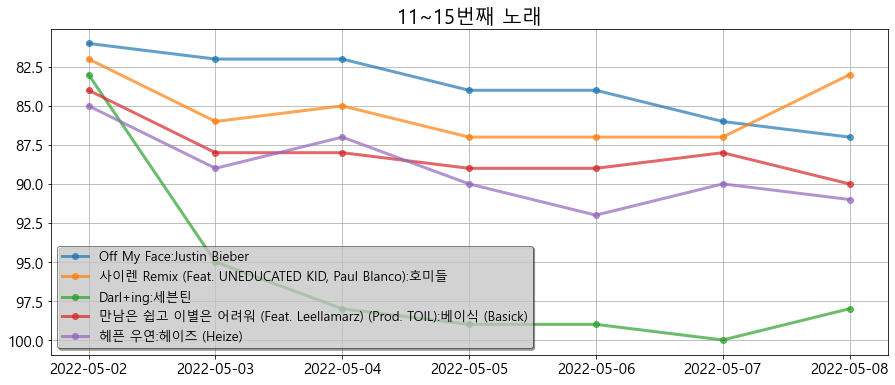

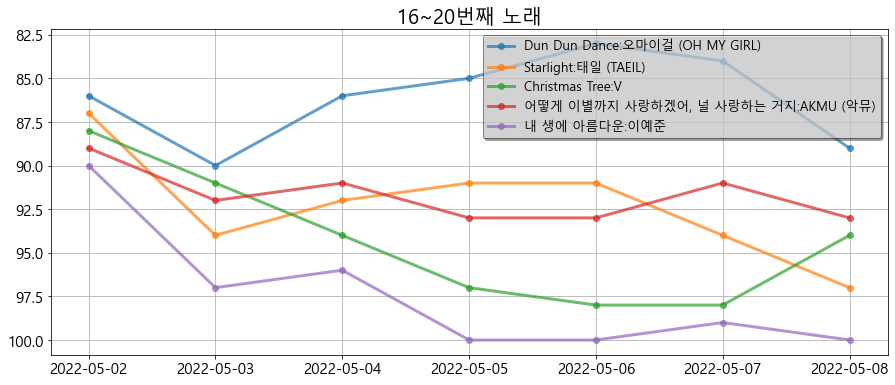

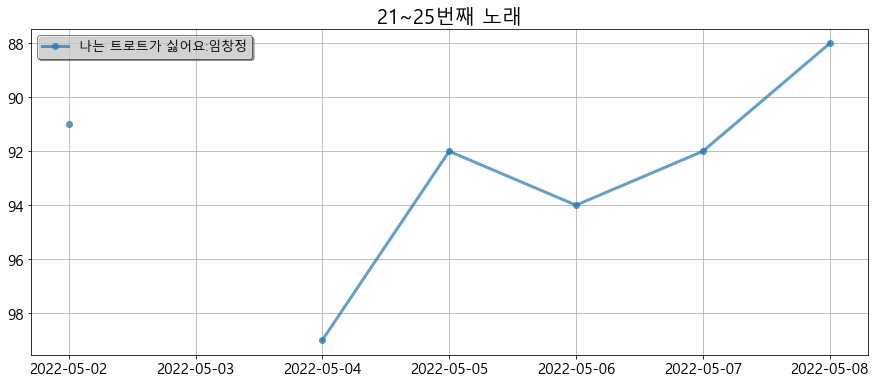

In [28]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [29]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

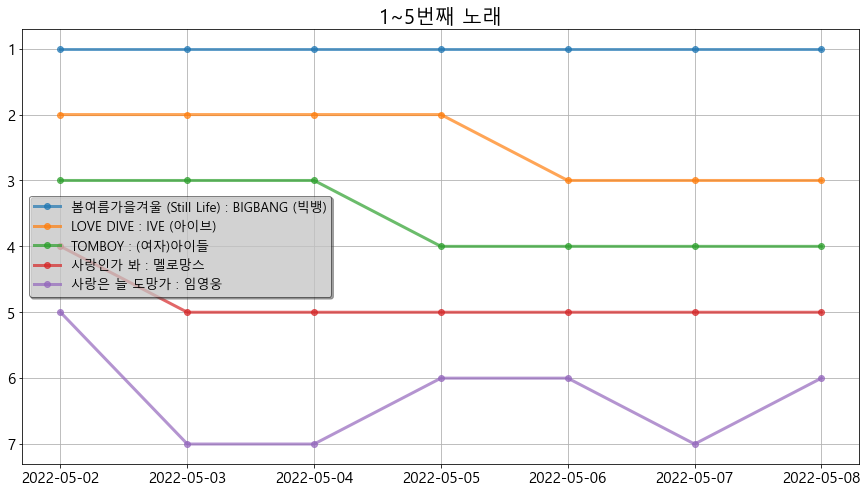

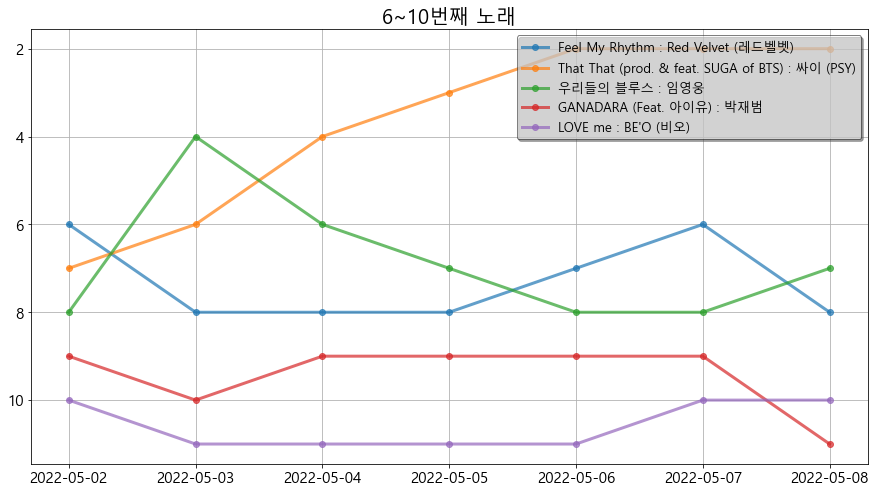

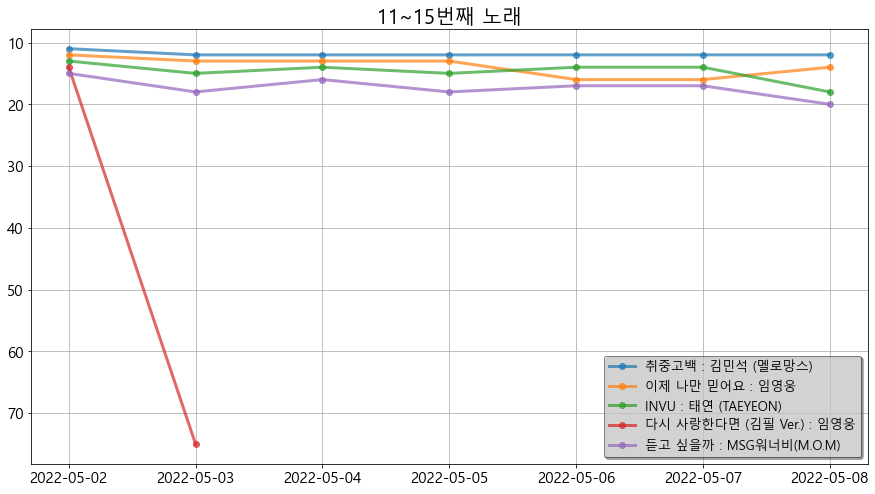

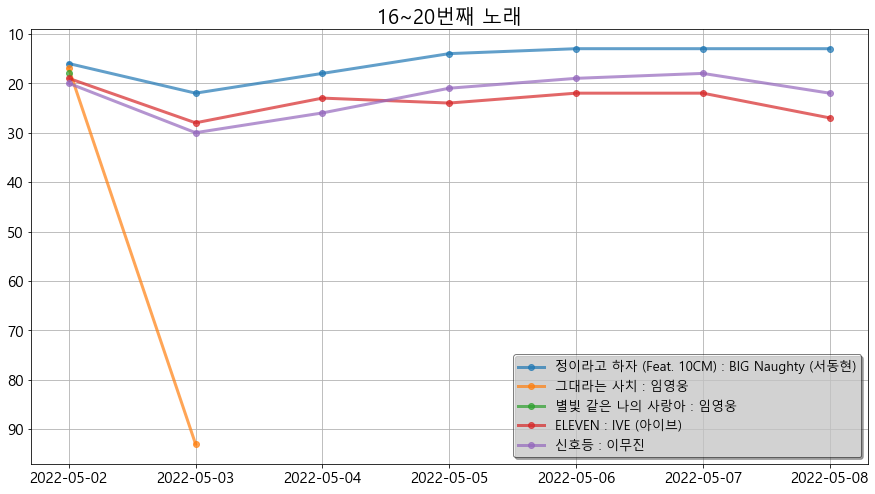

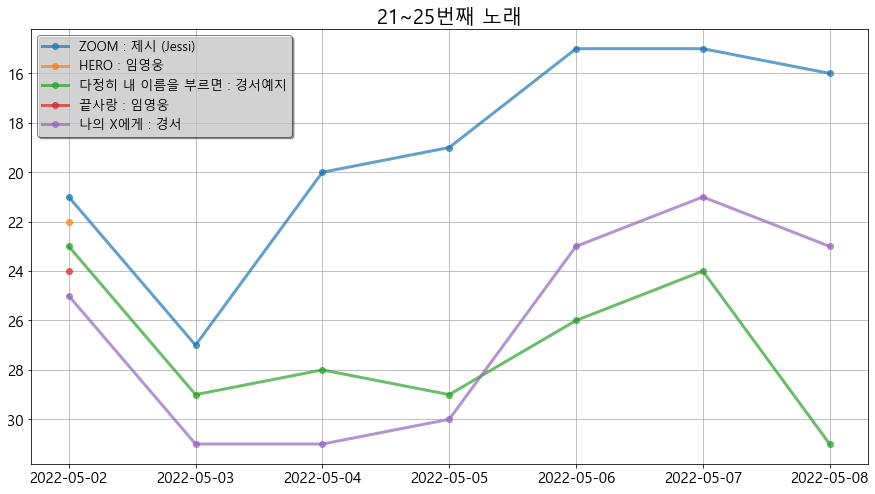

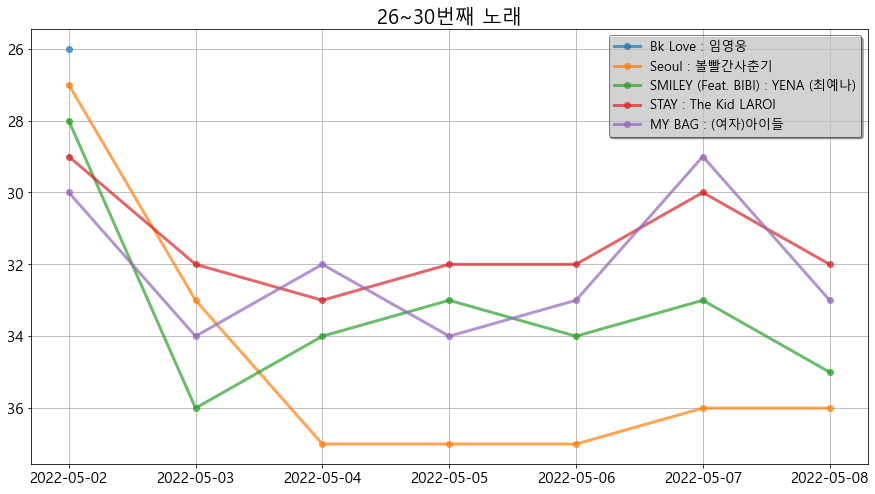

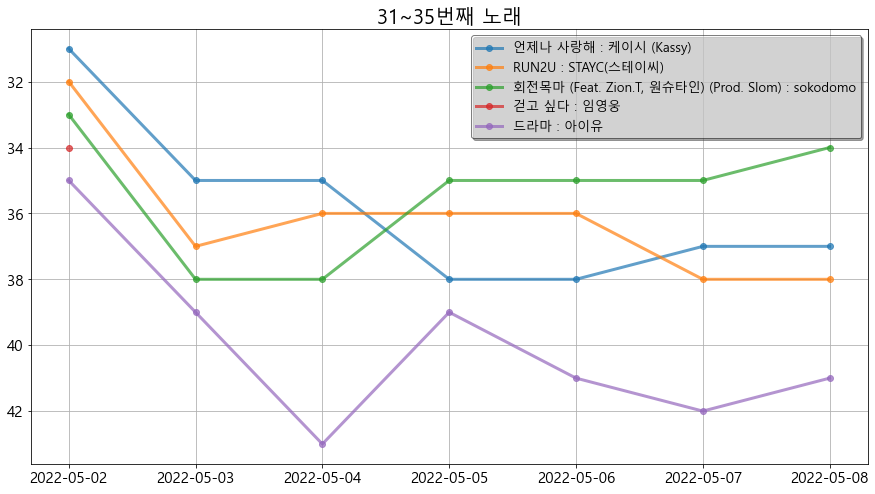

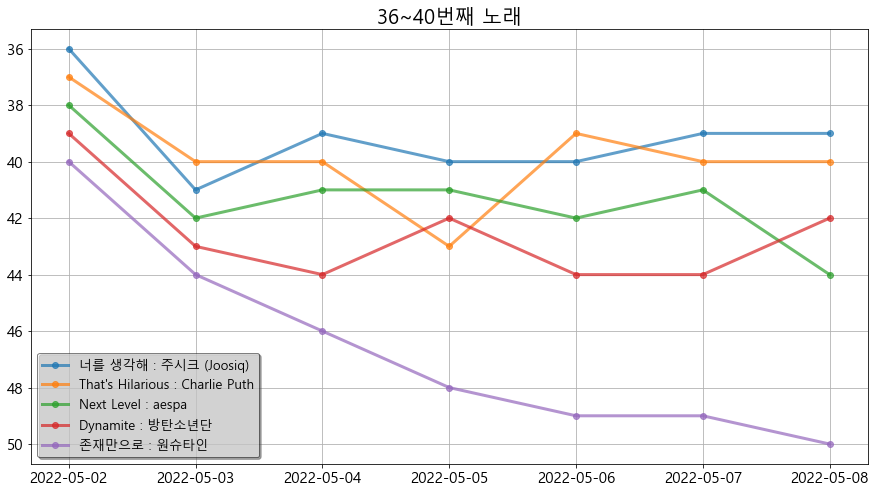

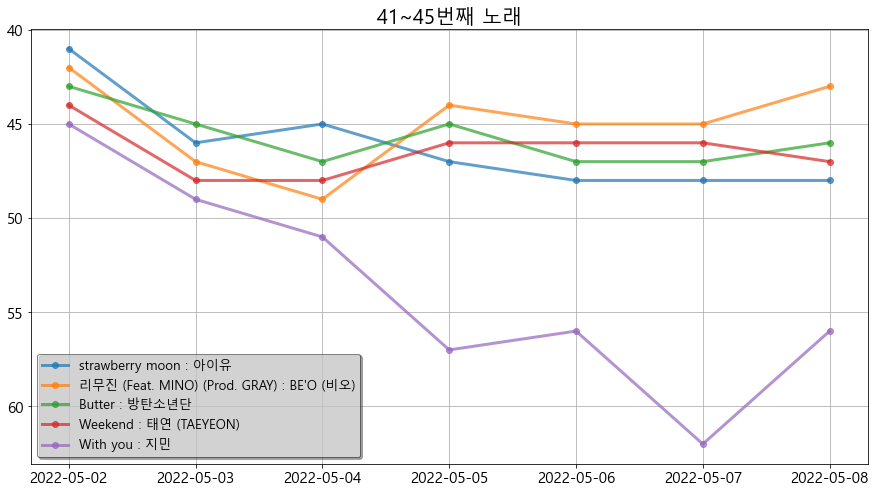

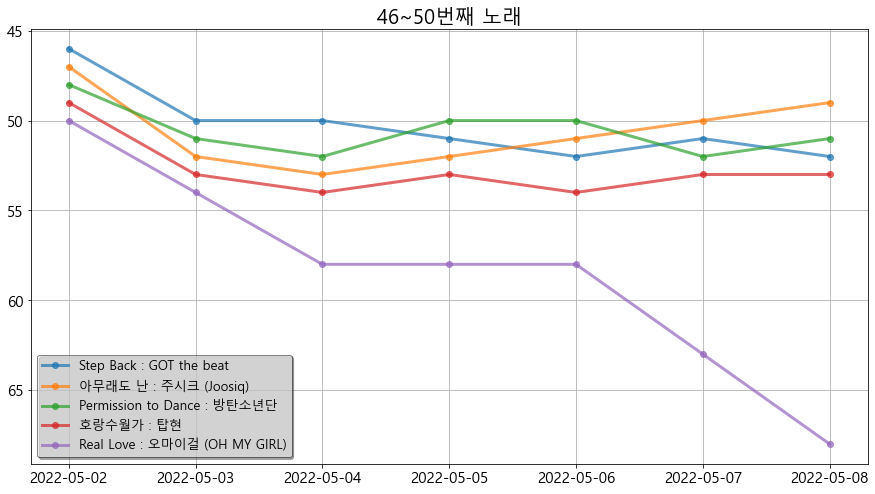

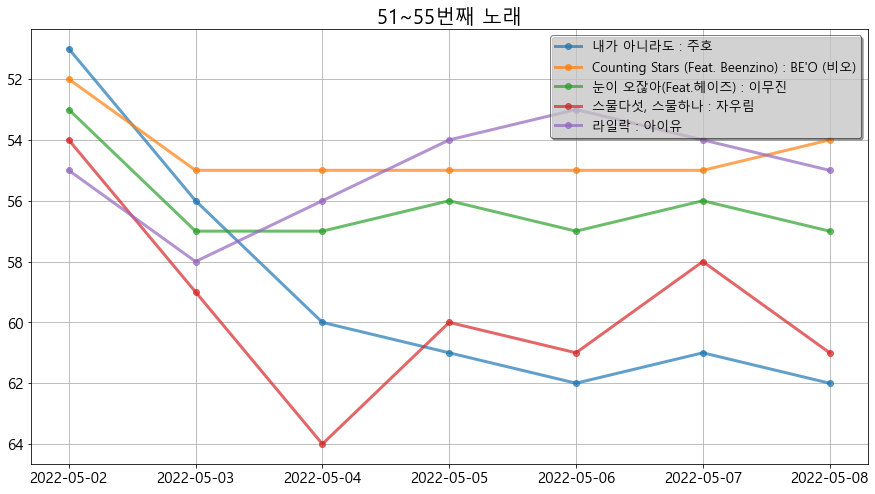

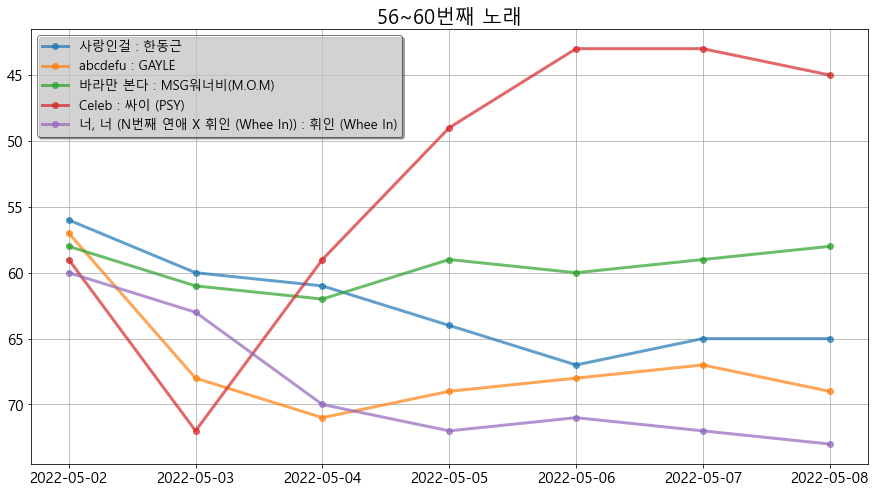

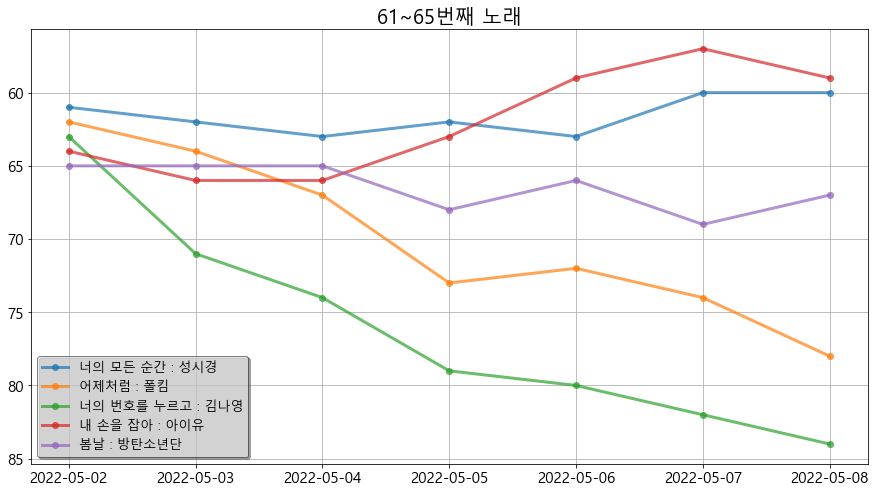

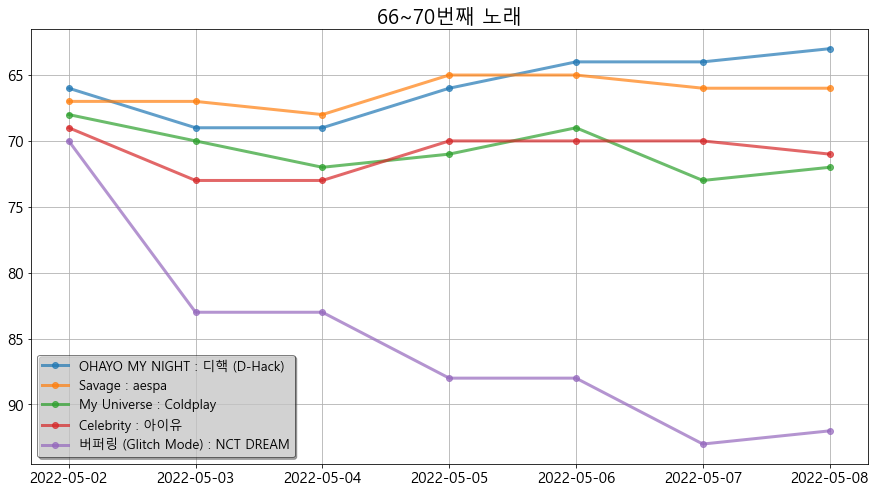

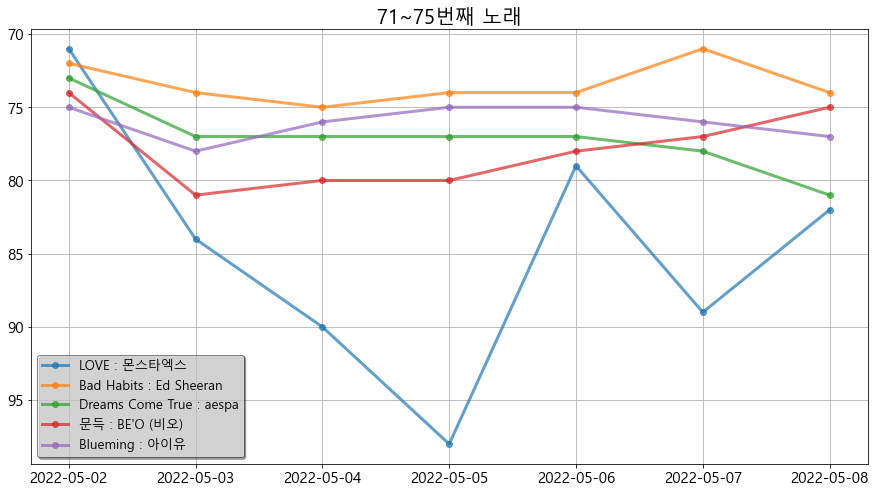

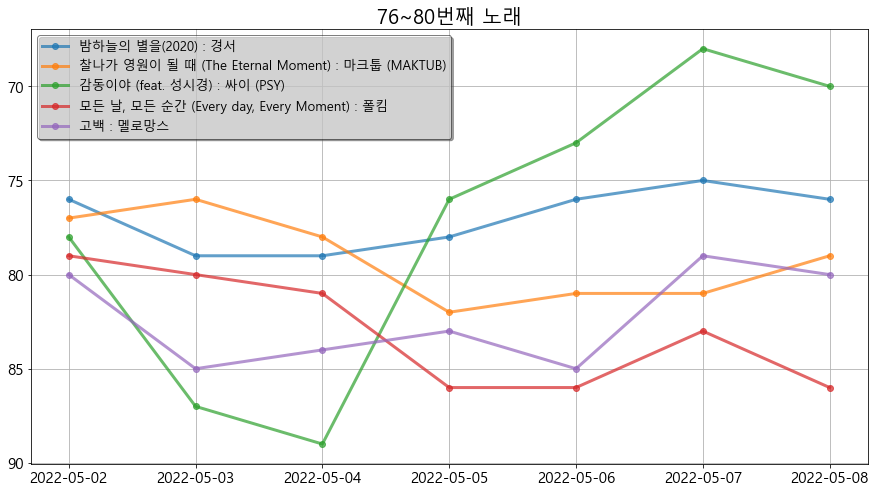

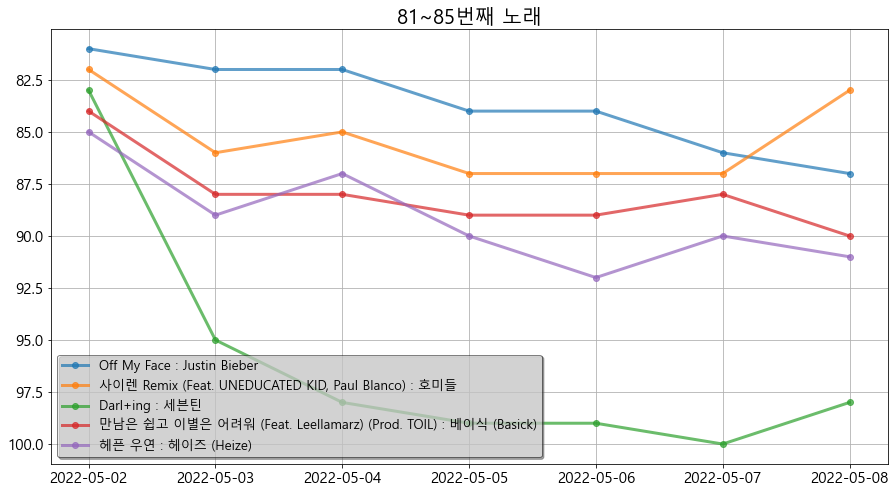

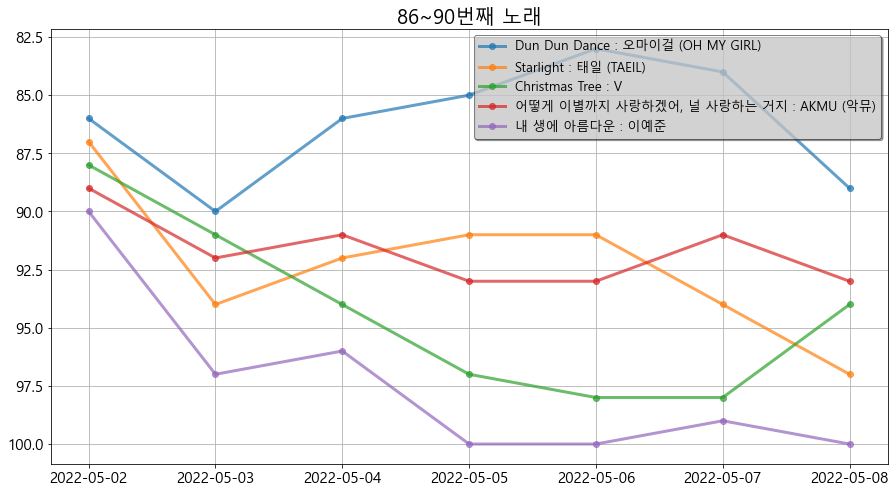

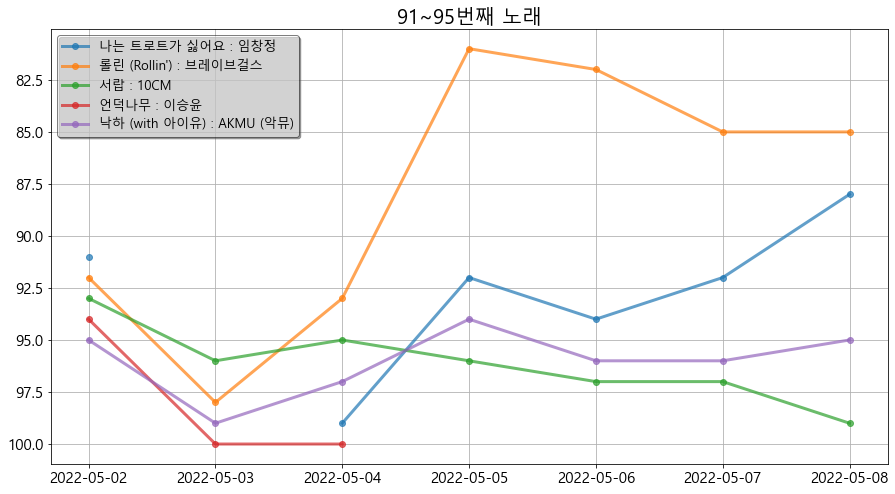

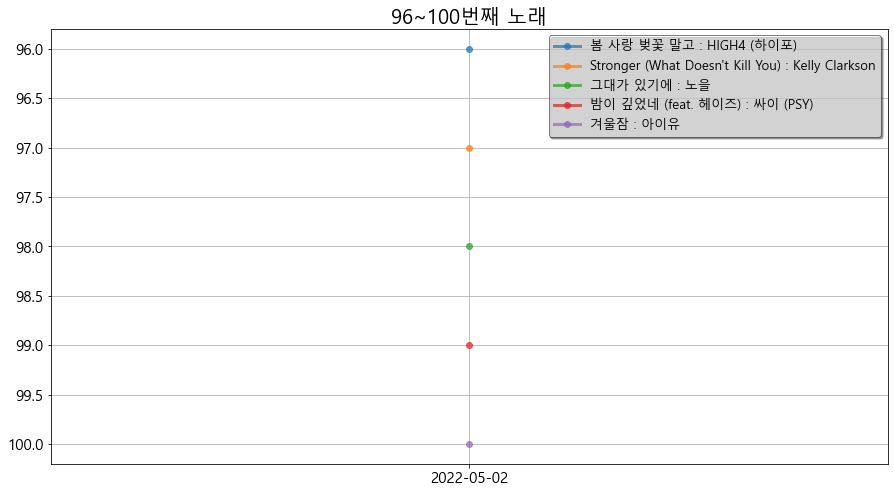

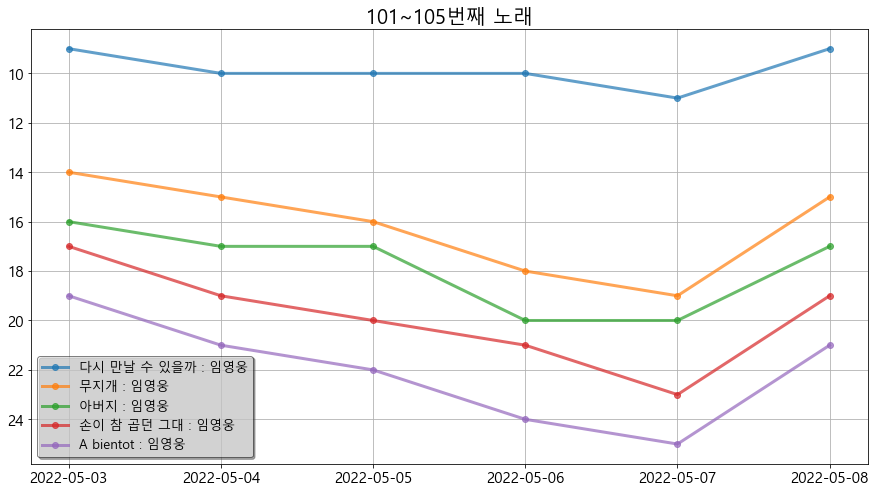

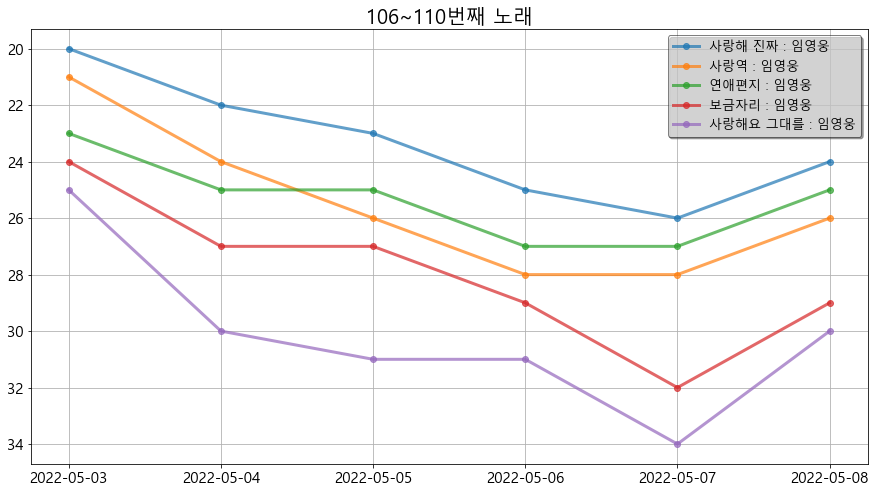

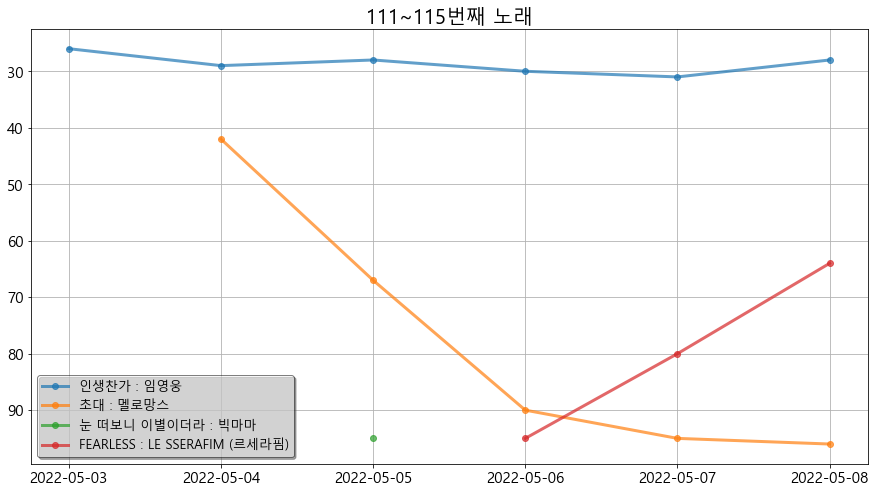

In [30]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [31]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

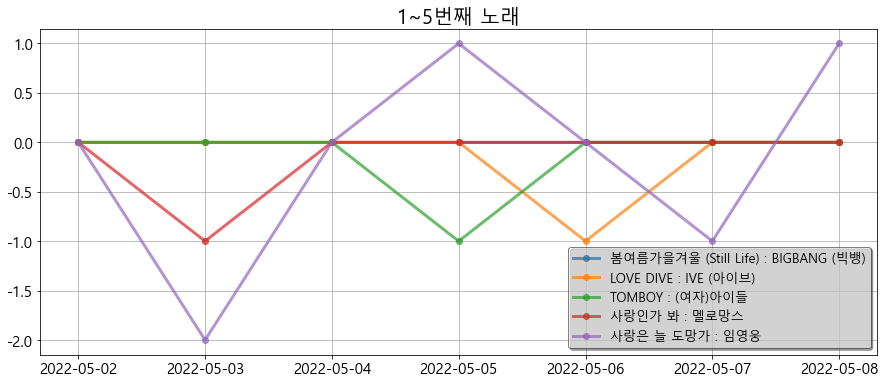

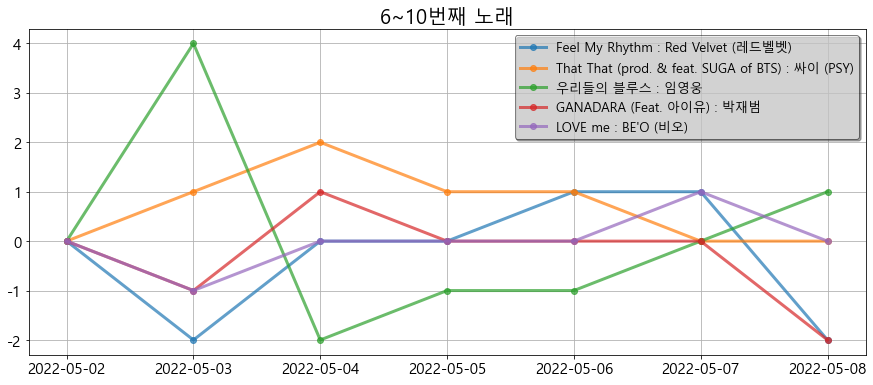

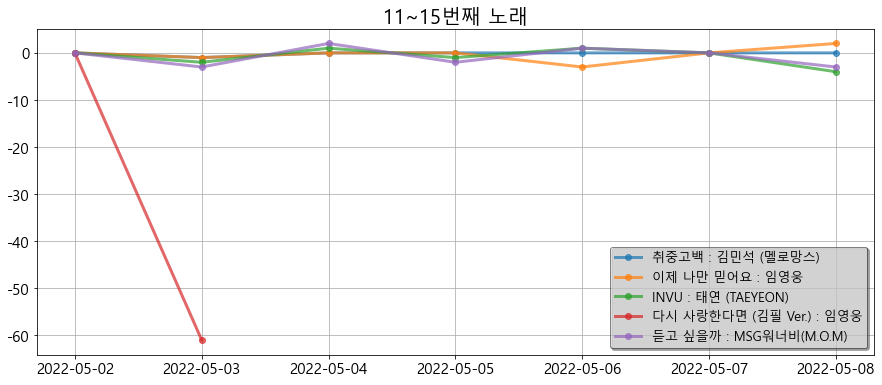

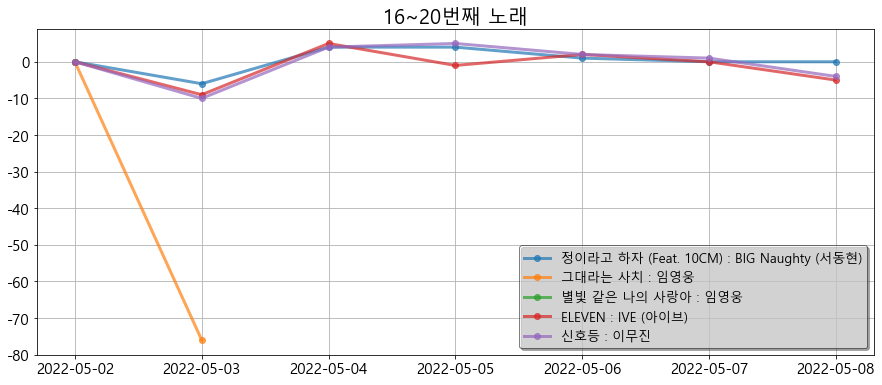

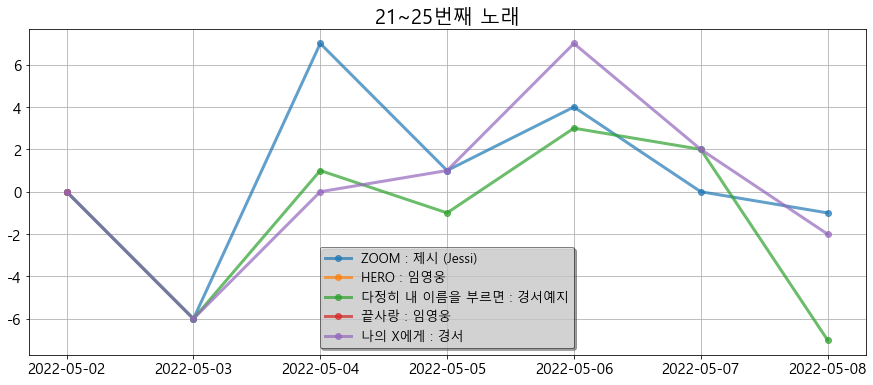

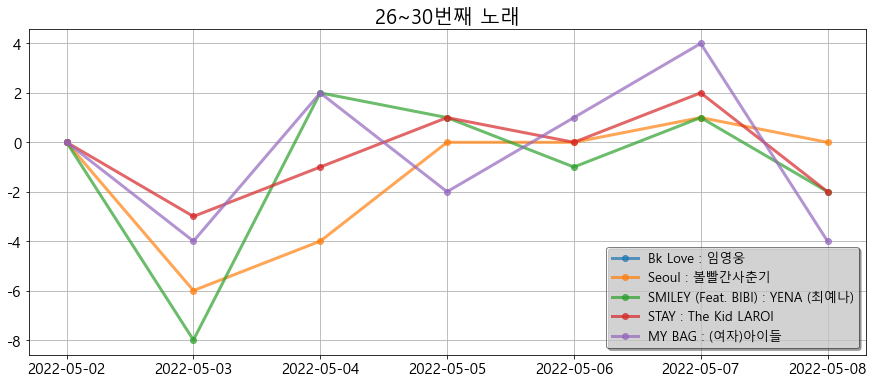

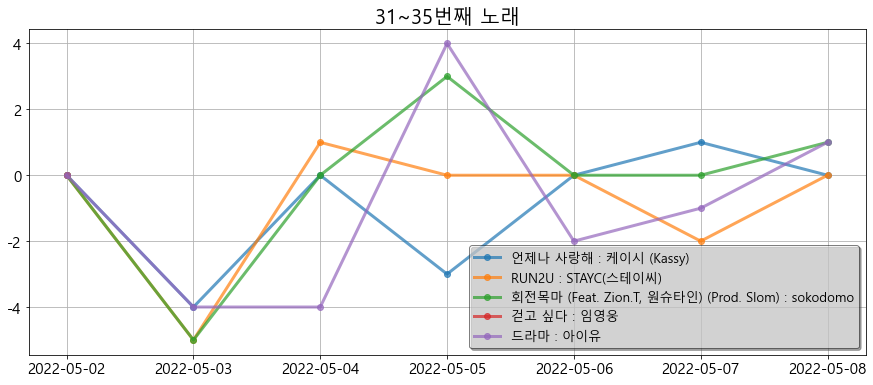

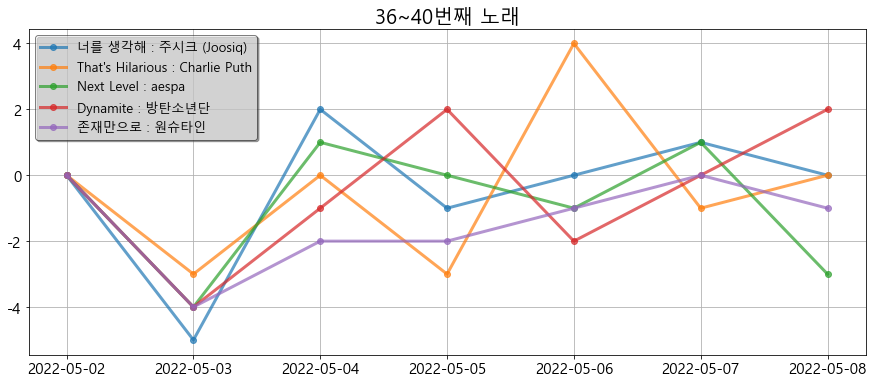

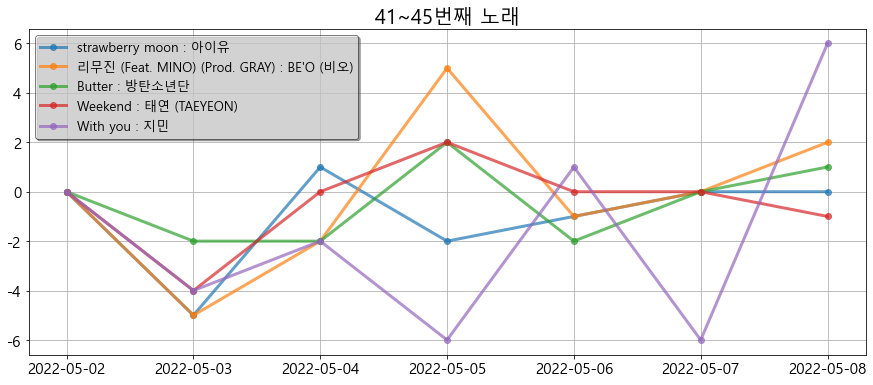

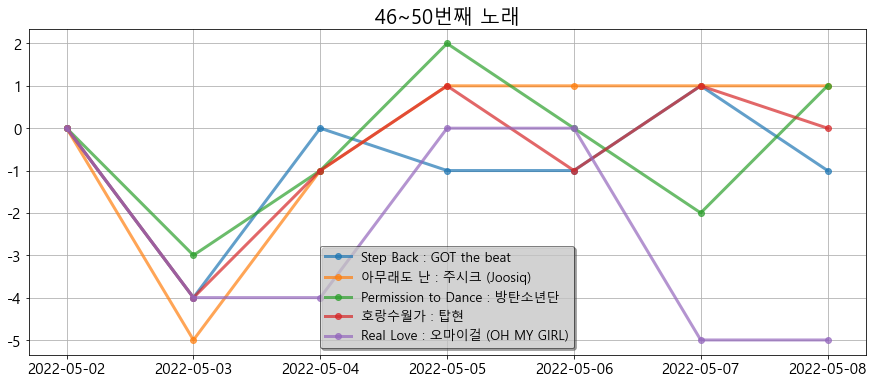

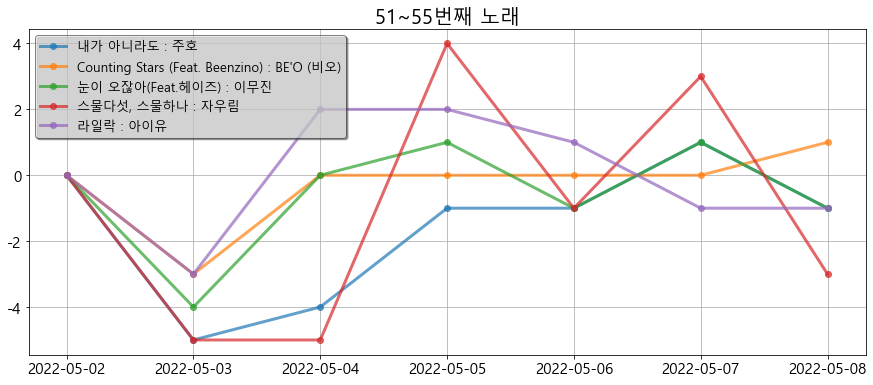

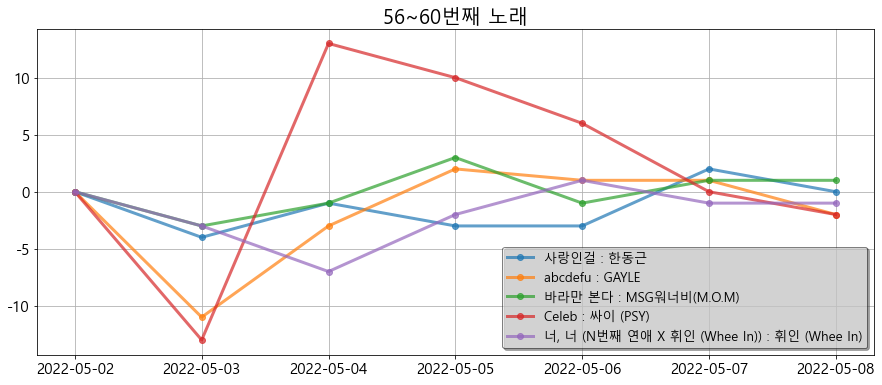

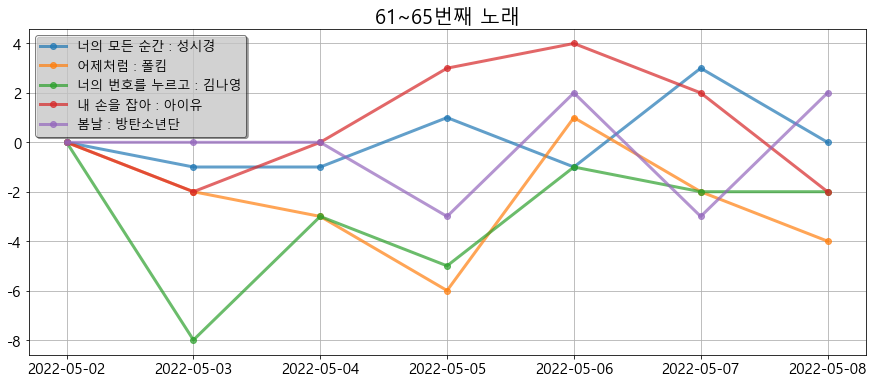

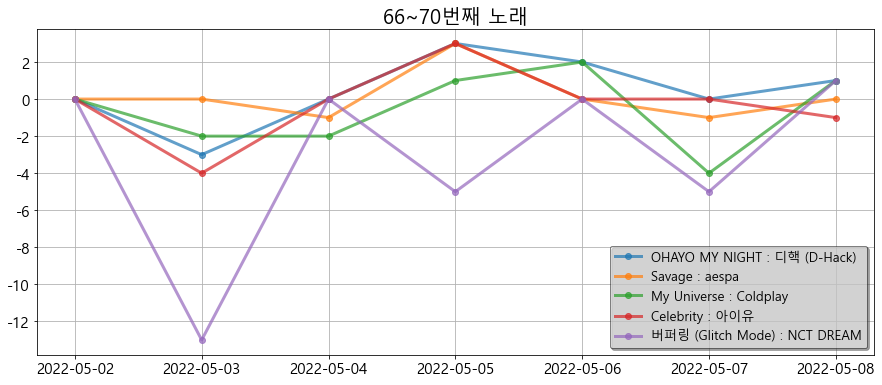

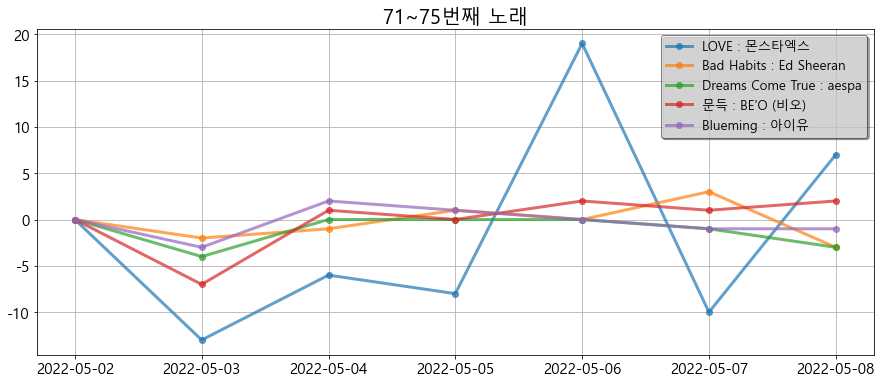

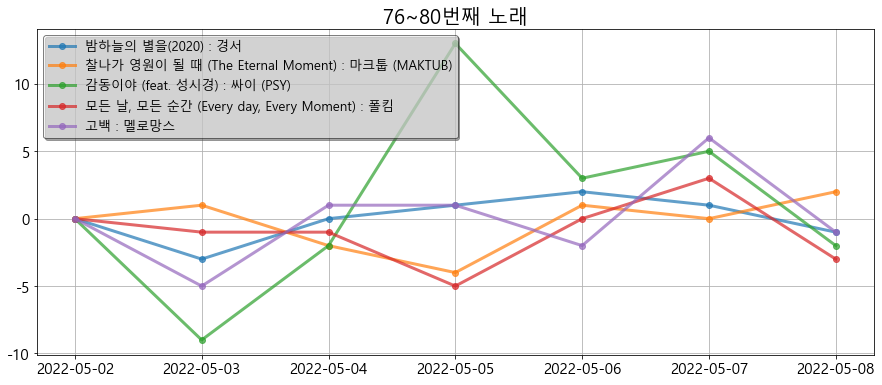

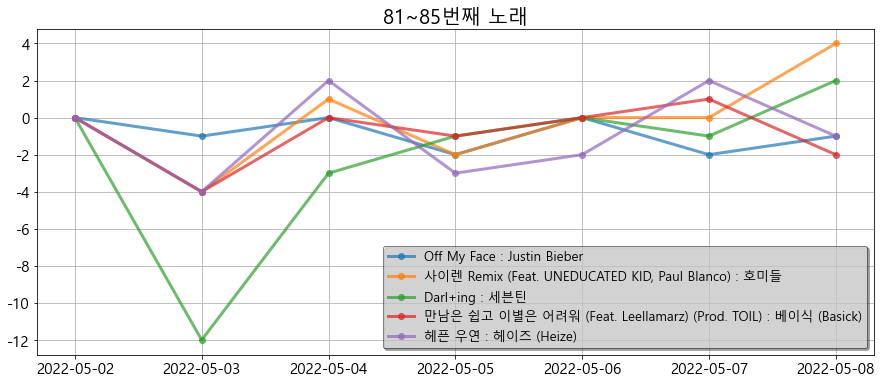

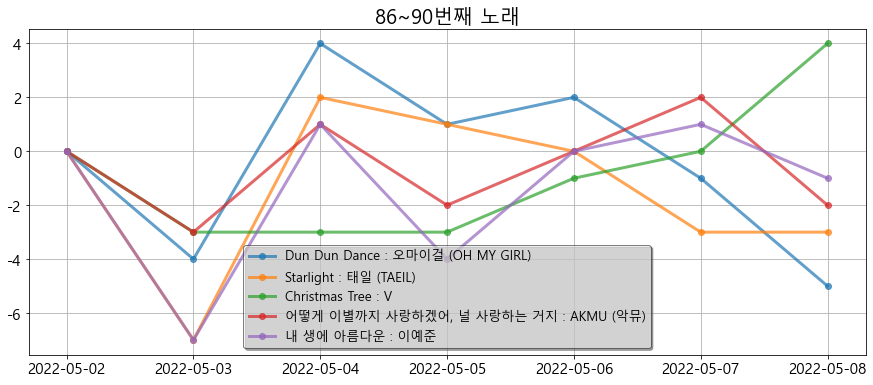

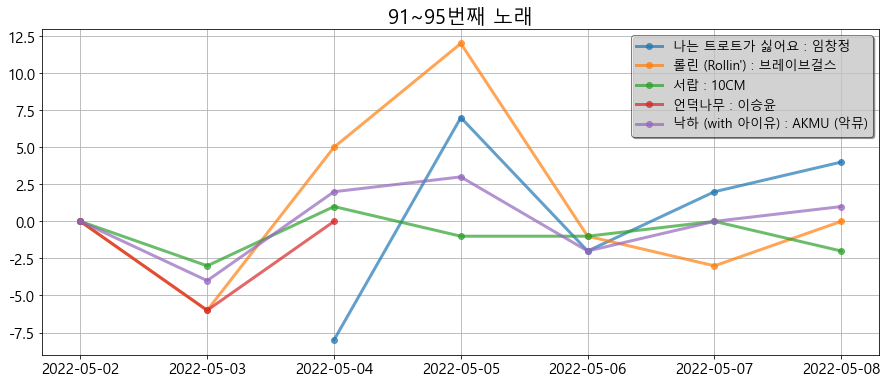

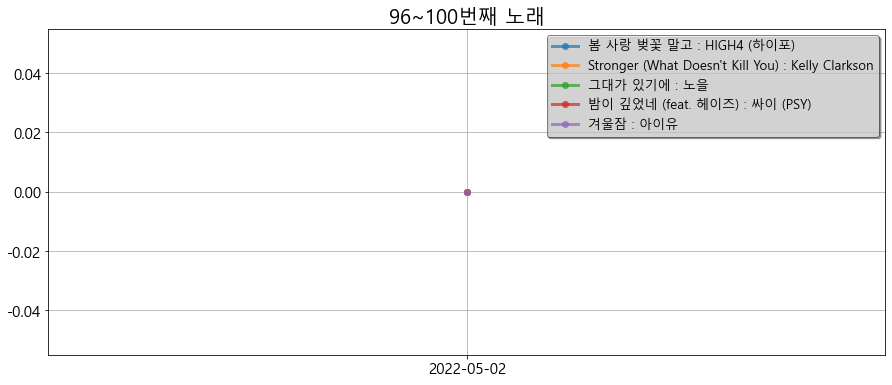

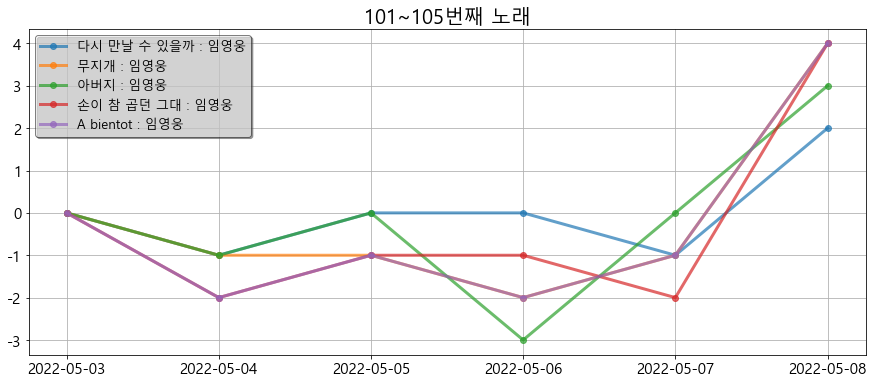

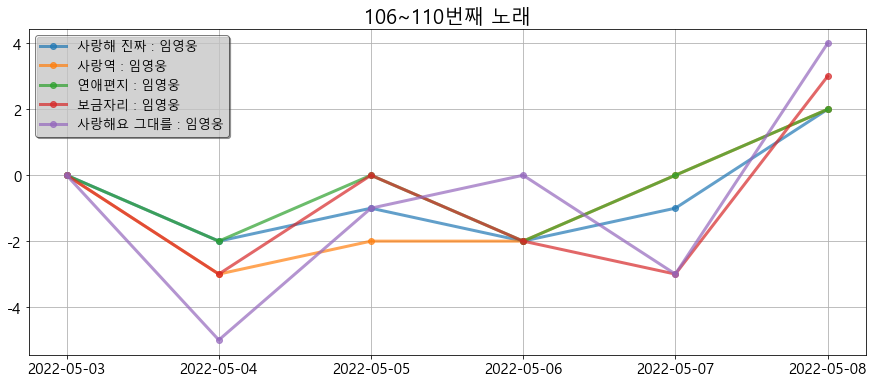

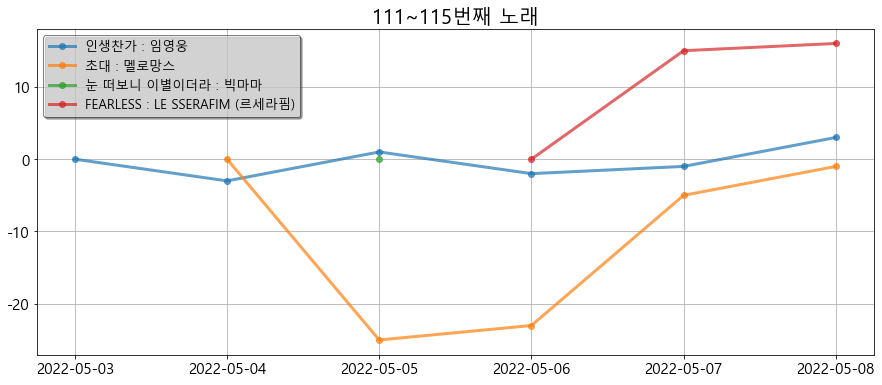

In [32]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [33]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [34]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      798 non-null    object 
 1   사이트     700 non-null    object 
 2   순위      700 non-null    float64
 3   곡       798 non-null    object 
 4   가수      798 non-null    object 
 5   앨범      798 non-null    object 
 6   소속사     700 non-null    object 
 7   소속사_분류  700 non-null    object 
 8   순위변동    700 non-null    float64
dtypes: float64(2), object(7)
memory usage: 56.2+ KB


In [35]:
total_df['순위변동'].describe()

count    700.000000
mean      -0.758571
std        4.863251
min      -76.000000
25%       -2.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: 순위변동, dtype: float64

In [36]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    173.000000
mean       2.612717
std        2.804743
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       19.000000
Name: 순위변동, dtype: float64

In [37]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

1.0 3.0 2.0 6.0


### 이상치 곡 추출

In [38]:
outlier_df = total_df[ total_df['순위변동'] > u_outlier ].drop_duplicates(['곡', '가수'], ignore_index=True)
outlier_df

날짜    사이트    순위                 곡                  가수  \
0  2022-05-04  melon  20.0              ZOOM          제시 (Jessi)   
1  2022-05-06  melon  23.0            나의 X에게                  경서   
2  2022-05-04  melon  59.0             Celeb            싸이 (PSY)   
3  2022-05-06  melon  79.0              LOVE               몬스타엑스   
4  2022-05-05  melon  76.0  감동이야 (feat. 성시경)            싸이 (PSY)   
5  2022-05-05  melon  92.0       나는 트로트가 싫어요                 임창정   
6  2022-05-05  melon  81.0      롤린 (Rollin')              브레이브걸스   
7  2022-05-07  melon  80.0          FEARLESS  LE SSERAFIM (르세라핌)   

              앨범           소속사 소속사_분류  순위변동  
0           ZOOM      P NATION     기타   7.0  
1         나의 X에게          꿈의엔진     기타   7.0  
2            싸다9      P NATION     기타  13.0  
3  SHAPE of LOVE           스타쉽    스타쉽  19.0  
4            싸다9      P NATION     기타  13.0  
5    별거 없던 그 하루로   예스아이엠엔터테인먼트     기타   7.0  
6        Rollin'         BRAVE     기타  12.0  
7       FEARLESS  SOURCE MUSIC     기타  15.0

In [39]:
# 이상치 곡 개수
print('이상치 곡의 개수 :', outlier_df.shape[0])

이상치 곡의 개수 : 8


In [40]:
mod_start_date = start_date.replace('-','')
mod_end_date = end_date.replace('-','')

path = f'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
os.makedirs(path, exist_ok=True)

In [41]:
# 이상치 음원 df 출력
outlier_df.to_excel(path + f'[{site_name}]{mod_start_date}_{mod_end_date}_outliers.xlsx', index=False)
print(f'[{site_name}]{mod_start_date}_{mod_end_date}_outliers.xlsx 출력')

[melon]20220502_20220508_outliers.xlsx 출력


### 급등 음원의 샘플 추출

In [219]:
big_change_music_name_list = outlier_df['곡'].tolist()
print('이상치 곡의 개수 :', len(big_change_music_name_list) ) 
print(big_change_music_name_list)

이상치 곡의 개수 : 8
['ZOOM', '나의 X에게', 'Celeb', 'LOVE', '감동이야 (feat. 성시경)', '나는 트로트가 싫어요', "롤린 (Rollin')", 'FEARLESS']


In [220]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[2] ].reset_index(drop=True)
temp

날짜    사이트    순위      곡        가수   앨범       소속사 소속사_분류  순위변동
0  2022-05-02  melon  59.0  Celeb  싸이 (PSY)  싸다9  P NATION     기타   0.0
1  2022-05-03  melon  72.0  Celeb  싸이 (PSY)  싸다9  P NATION     기타 -13.0
2  2022-05-04  melon  59.0  Celeb  싸이 (PSY)  싸다9  P NATION     기타  13.0
3  2022-05-05  melon  49.0  Celeb  싸이 (PSY)  싸다9  P NATION     기타  10.0
4  2022-05-06  melon  43.0  Celeb  싸이 (PSY)  싸다9  P NATION     기타   6.0
5  2022-05-07  melon  43.0  Celeb  싸이 (PSY)  싸다9  P NATION     기타   0.0
6  2022-05-08  melon  45.0  Celeb  싸이 (PSY)  싸다9  P NATION     기타  -2.0

In [221]:
title = temp['곡'].value_counts().index[0]
title

'Celeb'

In [222]:
artist = temp['가수'].value_counts().index[0]
artist

'싸이 (PSY)'

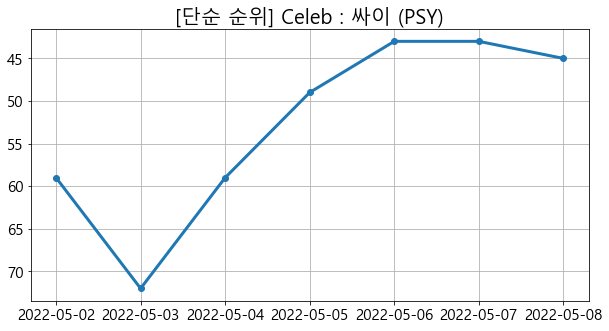

In [223]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 이상치 곡의 순위 그래프

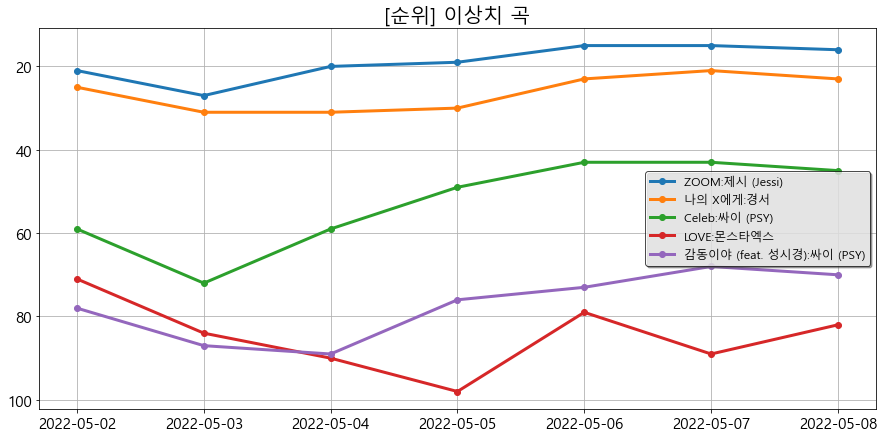

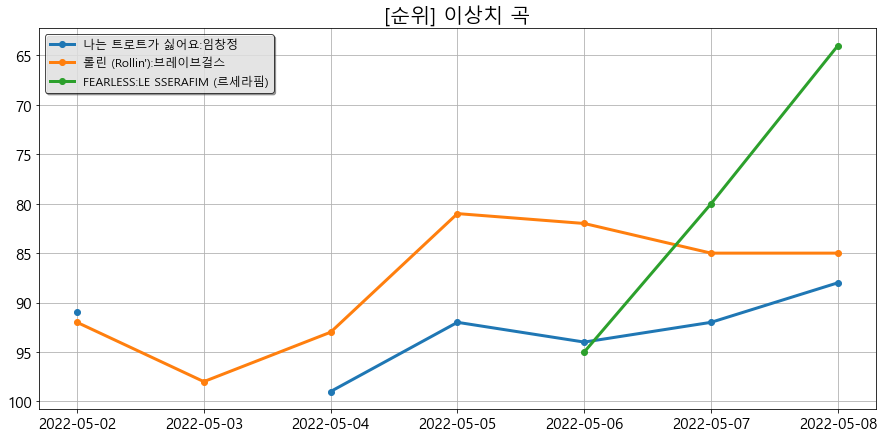

In [226]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
        plt.title('[순위] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위]이상치{i+1}.png'
    plt.savefig(path + img_name)

### 이상치 곡의 순위변동 그래프

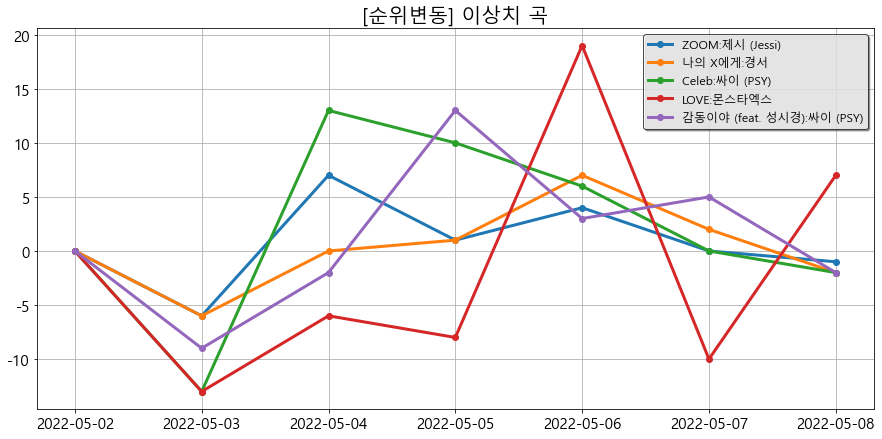

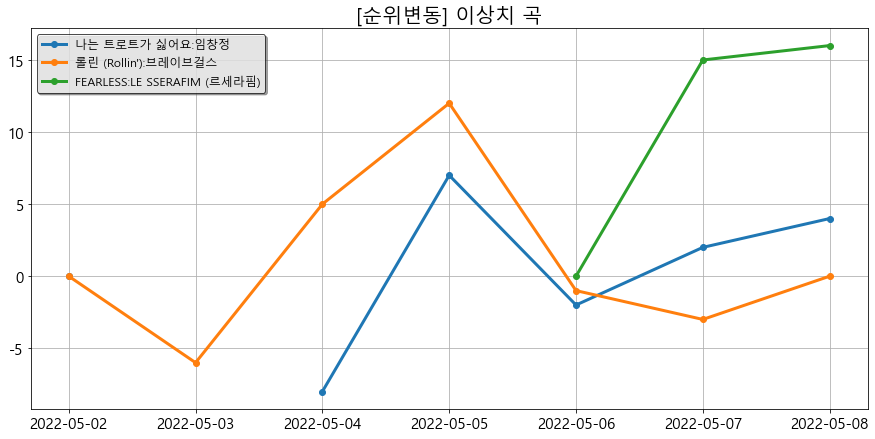

In [227]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
        plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위변동]이상치{i+1}.png'
    plt.savefig(path + img_name)

## 이상치 곡의 구글 트랜드 분석

In [228]:
try:
    os.chdir(code_path)
except:
    pass

In [229]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [230]:
start_date, end_date

('2022-05-02', '2022-05-08')

In [231]:
for one in big_change_music_name_list:
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(one)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_css_selector('button.widget-actions-item.export').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = total_df[total_df['곡'] == one]['가수'].unique()[0]
    search_title = one.replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}_{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_2492/689724725.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2492/689724725.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('button.widget-actions-item.export').click()


In [232]:
driver.quit()

### 파일 이동

In [233]:
import glob
import shutil

In [234]:
try:
    os.chdir('C:/Users/kbjung/Downloads')
except:
    pass

In [235]:
os.listdir()

['(주)원트리즈뮤직_휴가계(양식).doc',
 'Anaconda3-2021.05-Windows-x86_64.exe',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'D2Coding.ttf',
 'desktop.ini',
 'DiscordSetup.exe',
 'LanguageFile_ko-KR_Kim Y. Ch. + CJW Patch_2.xml',
 'SumatraPDF-3.3.3-64-install.exe',
 'VSCodeUserSetup-x64-1.66.1.exe',
 '[melon]20220509_132015_ZOOM_제시 (Jessi).csv',
 '[melon]20220509_132023_나의_X에게_경서.csv',
 '[melon]20220509_132031_Celeb_싸이 (PSY).csv',
 '[melon]20220509_132038_LOVE_몬스타엑스.csv',
 '[melon]20220509_132045_감동이야_(feat._성시경)_싸이 (PSY).csv',
 '[melon]20220509_132053_나는_트로트가_싫어요_임창정.csv',
 "[melon]20220509_132102_롤린_(Rollin')_브레이브걸스.csv",
 '[melon]20220509_132110_FEARLESS_LE SSERAFIM (르세라핌).csv',
 '당직스케줄_20220426.xlsx']

In [236]:
csv_file_list = glob.glob('*.csv')
csv_file_list

['[melon]20220509_132015_ZOOM_제시 (Jessi).csv',
 '[melon]20220509_132023_나의_X에게_경서.csv',
 '[melon]20220509_132031_Celeb_싸이 (PSY).csv',
 '[melon]20220509_132038_LOVE_몬스타엑스.csv',
 '[melon]20220509_132045_감동이야_(feat._성시경)_싸이 (PSY).csv',
 '[melon]20220509_132053_나는_트로트가_싫어요_임창정.csv',
 "[melon]20220509_132102_롤린_(Rollin')_브레이브걸스.csv",
 '[melon]20220509_132110_FEARLESS_LE SSERAFIM (르세라핌).csv']

In [237]:
path

'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/melon/'

In [238]:
for file in csv_file_list:
    des = path + file
    shutil.move(file, des)

# 코드 마지막